# Introduction:
This project is based on a dataset consisting of movie ratings and other attributes such as financials and popularity. We will investigate this dataset to see what are the most important variables that contribute to the success of a movie.

In [1]:
#install packages for project
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
%matplotlib inline
from matplotlib.pyplot import figure

# Data Wrangling

We read the document and then continue to clean the document. This includes rounding up the voting to two decimal places and converting the financials to million GBP.

In [2]:
#read document
movies = pd.read_csv('movies.csv')
print(movies.shape)
movies.head(1)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#only keep columns that we need for analysis
movies = movies.filter(items=['popularity','original_title','genres','release_date','vote_average','budget_adj','revenue_adj'])
print(movies.shape)
movies = movies.dropna()
print(movies.shape)

#drop rows that have atleast one zero in

movies = movies[(movies!=0).all(1)]
movies.shape

(10866, 7)
(10843, 7)


(3855, 7)

In [40]:
#format the table, round popularity, make money into millions for easier read, split genre into different columns
movies['popularity'] = movies['popularity'].round(2)
movies['budget_adj'] = round(movies['budget_adj'] / 1000000)
movies['revenue_adj'] = round(movies['revenue_adj'] / 1000000)
#select the first genre as the primary genre
movies["genres"]= movies["genres"].str.split("|", n = 1, expand = True)
print(movies.shape)
movies.head(1)

(3855, 7)


,popularity,original_title,genres,release_date,vote_average,budget_adj,revenue_adj
0,32.99,Jurassic World,Action,6/9/15,6.5,138.0,1392.0


#### Steps taken to clean data:

1. Filter out the columns not needed for analysis. This took away 14 columns and helped in visualising the data when printing headers in the subsequent sections
2. Drop nas. there weren't a lot of NA's as there were 0's present in some columns 
3. Removed rows that had 0. I did this to keep the dataset consistent for all the analaysis rather than taking zero's out from various columns for the different questions.  
4. Rounded the popularity column to make it cleaner and more readable
5. Changed scaling of budget and revenue columns to millions.
6. Split the genres column and only kept the 'primary' genre. This assumed that the first genre in the list is primary.

# Exploratory Data Analysis

In this section we till try to dig into the data and see what influences movie popularity, and what genre has been the most popular over the years.

### Research Question 1 : Is there a link between budget and revenue?

Text(0.5,1,'Budget vs revenue')

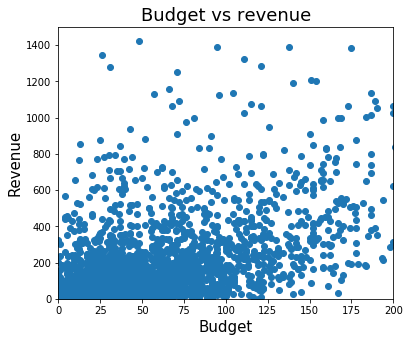

In [56]:
#Find the link between budget and revenue with a scatter plot
#I delete the 0 value rows here as we don't mind 0's in these columns for Q2 and Q3
plt.rcParams['figure.figsize'] = [6, 5]
plt.scatter(movies['budget_adj'],movies['revenue_adj'])
plt.xlim(0,200)
plt.ylim(0, 1500)
plt.xlabel("Budget", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)
plt.title('Budget vs revenue', fontsize = 18)

The graph shows us that there is no clear correlation between budget and revenue.

Text(0.5,1,'Budget')

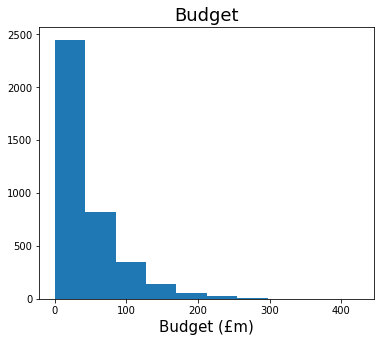

In [58]:
#we can check the the distribution of movie budgets
plt.rcParams['figure.figsize'] = [6, 5]
plt.hist(movies['budget_adj'])
plt.xlabel("Budget (£m)",fontsize = 15)
plt.title('Budget',fontsize = 18)

Most of the movies have a budget less than 100m

### Research Question 2 : Is the vote average influenced by when the movie was released?

In [43]:
#This is the method I used originally but was quite inefficient, so I redid this.

# q1 = movies[['release_date','vote_average']]
# q1['release_date'] = pd.to_datetime(q1['release_date'],format="%m/%d/%y")
# q1['month']  = q1['release_date'].dt.month

# #take averages of month
# january = q1[q1['month']==1].mean().astype(float)
# february = q1[q1['month']==2].mean().astype(float)
# march = q1[q1['month']==3].mean().astype(float)
# april = q1[q1['month']==4].mean().astype(float)
# may = q1[q1['month']==5].mean().astype(float)
# june = q1[q1['month']==6].mean().astype(float)
# july = q1[q1['month']==7].mean().astype(float)
# august = q1[q1['month']==8].mean().astype(float)
# september = q1[q1['month']==9].mean().astype(float)
# october = q1[q1['month']==10].mean().astype(float)
# november = q1[q1['month']==11].mean().astype(float)
# december = q1[q1['month']==12].mean().astype(float)

#create new dataframe comprising of mean and the month
# vote_months = pd.DataFrame({'January': january, 'February' : february, 'March':march,'April':april, 'May':may,
#                             'June':june,'July':july,'August':august,'September':september,
#                             'October':october, 'November':november, 'December':december})

#The method below is more efficient

vote_months = movies[['release_date','vote_average']]

#Get the month name after converting date to datetime
vote_months['release_date'] = pd.to_datetime(vote_months['release_date'],format="%m/%d/%y")
vote_months['month']  = vote_months['release_date'].dt.month_name()

#drop vote_average == 0(null)
vote_months = vote_months[vote_months['vote_average'] != 0]

#drop the release date column
vote_months = vote_months.drop(['release_date'],axis=1)

#add mean column and delete the duplicate months
vote_months['vote_mean'] = vote_months.groupby('month')["vote_average"].transform('mean')
vote_months = vote_months.drop_duplicates(['month'],keep = 'first')
vote_months['month_index'] = pd.DatetimeIndex(pd.to_datetime(vote_months['month'], format='%B')).month

#add index
vote_months = vote_months.set_index('month_index').sort_index()
vote_months = vote_months.filter(items=['month','vote_mean'])
vote_months.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,month,vote_mean
month_index,,
1,January,5.920444
2,February,6.077043
3,March,6.078571
4,April,6.051311
5,May,6.257045


We can see that the movies released in december have the highest rating, and the lowest are in January. This also ties in with the idea of 'Oscar Season' which suggests that studios invest heavily from end of november to december in productions. 

(5.7999999999999998, 6.5)

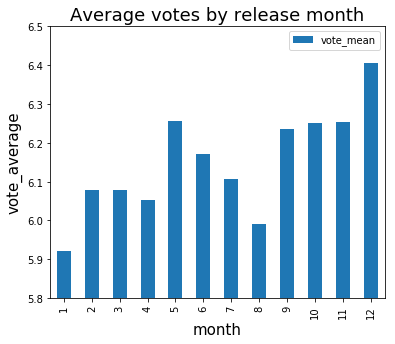

In [60]:
#Create bar chaart to show the voting averages over the months
vote_months.plot(kind = 'bar')
plt.xlabel('month',fontsize = 15)
plt.title('Average votes by release month',fontsize = 18)
plt.ylabel('vote_average',fontsize = 15)
plt.ylim(bottom = 5.8)
plt.ylim(top = 6.5)

The data shows us that movies released in December tend to have the highest voting average. This could possible be due to the oscar season, however we cannot say that for sure by looking at the data.

### Research Question 3: what genres are most popular, and what has been the popular genre in the 20 years?

In [46]:
movies.head(2)

,popularity,original_title,genres,release_date,vote_average,budget_adj,revenue_adj
0,32.99,Jurassic World,Action,6/9/15,6.5,138.0,1392.0
1,28.42,Mad Max: Fury Road,Action,5/13/15,7.1,138.0,348.0


In [47]:
#Create a new dataframe, format date.
genre_df = movies.filter(items = ['genres','release_date','popularity'])
genre_df['popularity'] = genre_df['popularity'].astype(int)
genre_df['release_date'] = pd.to_datetime(genre_df['release_date'],format="%m/%d/%y")
genre_df['release_date'] = genre_df['release_date'].dt.year
year = []
for x in genre_df['release_date']:
    if x >2016:
        x = x-100
    else:
        x = x
    year.append(x)
genre_df['release_date'] = year
genre_df = genre_df[genre_df.release_date >1995]
print(max(genre_df['release_date']))

#drop null values
genre_df = genre_df[genre_df['popularity'] != 0]

2015


In [48]:
#plot pivot table
popularity_pivot= pd.pivot_table(genre_df,index=['genres','release_date'],values=["popularity"],aggfunc=[np.mean])
popularity_pivot.head()

mean
                    popularity
genres release_date           
Action 1996           1.571429
       1997           1.500000
       1998           1.250000
       1999           3.000000
       2000           1.428571

In [49]:
#another way to plot pivot table, drop columns that have NA in them. This would leave us with primary genres only that have data.
genre_pivot = genre_df.pivot_table('popularity',
                     index='release_date',
                     columns='genres',
                     aggfunc='mean')
genre_pivot = genre_pivot.dropna(axis='columns')
genre_pivot.head()

genres,Action,Adventure,Animation,Comedy,Drama,Horror
release_date,,,,,,
1996,1.571429,2.00,1.0,1.166667,1.250000,1.0
1997,1.500000,1.50,2.0,1.000000,1.714286,1.0
1998,1.250000,1.00,2.0,2.333333,1.200000,1.5
1999,3.000000,1.80,1.0,1.000000,2.222222,1.0
2000,1.428571,1.25,1.0,1.000000,1.000000,1.0


Text(0.5,1,'Genre popularity (1996-2015)')

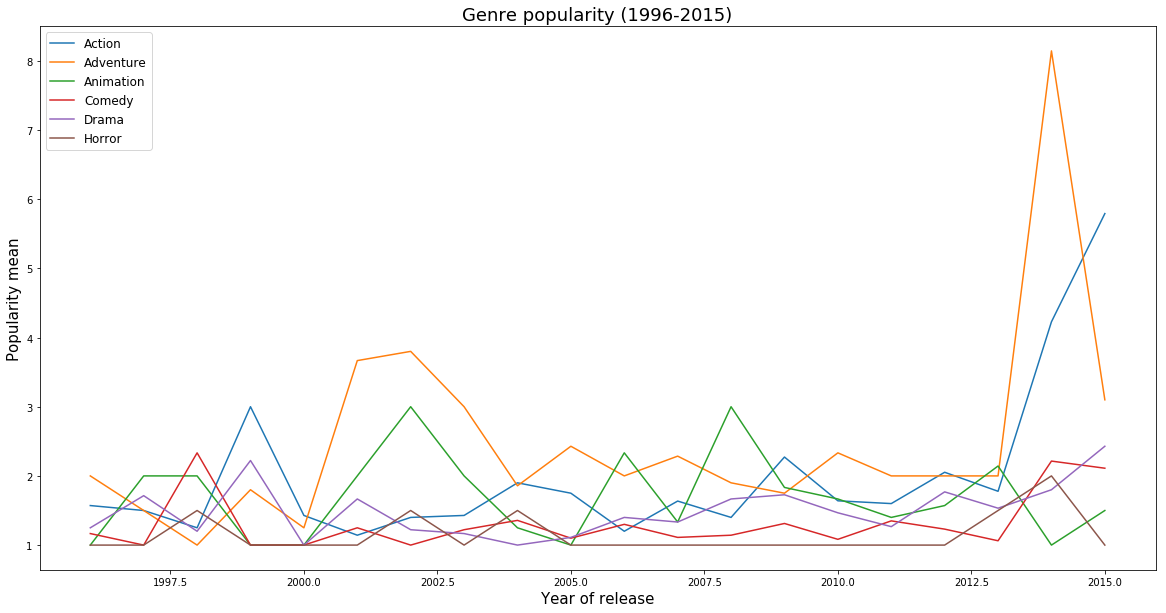

In [64]:
plt.rcParams['figure.figsize'] = [20, 10]
genre_pivot.plot()
plt.legend(fontsize=12)
plt.ylabel('Popularity mean',fontsize = 15)
plt.xlabel('Year of release',fontsize = 15)
plt.title('Genre popularity (1996-2015)',fontsize = 18)

Adventure has consistently been the popular choice between viewers while documentaries are the least popular. In the last couple of years. Action has seen the the largest increase in popularity due to popular movies such as Jurassic world, Mad Max and Guardians of the Galaxy.

In [65]:
#shows us the top rated action movies
movies[movies['genres']=='Action'].sort_values('popularity',ascending = False).head(5)

,popularity,original_title,genres,release_date,vote_average,budget_adj,revenue_adj
0,32.99,Jurassic World,Action,6/9/15,6.5,138.0,1392.0
1,28.42,Mad Max: Fury Road,Action,5/13/15,7.1,138.0,348.0
630,14.31,Guardians of the Galaxy,Action,7/30/14,7.9,157.0,712.0
631,12.97,Captain America: The Winter Soldier,Action,3/20/14,7.6,157.0,658.0
632,11.42,John Wick,Action,10/22/14,7.0,18.0,73.0


### Conclusion

#### Findings
This project found no relationship between budget and revenue. On average, movies released in december accrued the highest vote. There is some confusion as to the difference between vote_average and popularity, so we have used both measures. We used vote_average when comparing release_dates and popularity when comparing popularity in a time series view. Action movies are found to be consistently popular. On the other hand, Documentaries are the least popular. This was based on the assumption that the first genre in the column 'genres' was the primary genre. 

#### Possible questions
It would be interesting to do a deeper analysis on highest grossing actors and successful directors. Analysis of content spend by the different production studios and their success rate measured by popularity would also be another interesting analysis.

#### Limitations
The columns included null values which greatly reduced the sample size, and and subsequently the reliability of the analysis due to the smaller sample size. These null values were taken out before analysing the data. Insufficient clarity on the difference between vote_average and popularity makes the results unclear. 

In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0